## Beispiel: Kragarm mit 2 Punktmassen

Das in @fig-kragarm_2_punkte dargestellte System stellt einen Kragarm mit verteilter Masse und 2 Punktmassen dar. Eine mögliche Formfunktion ist rechts daneben gezeigt.

![Kragarm mit verteilter Masse und 2 Punktmassen](bilder\kragarm_verteilte_masse1.png){#fig-kragarm_2_punkte}

Gesucht:

- Grundfrequenz (1. Eigenfrequenz $\omega_n$) des Systems in @fig-kragarm_2_punkte, berechnet mit dem Rayleigh-Quotienten.

Gegeben:

- Randbedingungen für den Spezialfall:
$$m = 0 \text{ und } M_1 = M_2 = M$$
- Formfunktion:
$$ \psi(x) = 1 - \cos(\frac{\pi x}{2L})$$


{{< pagebreak >}}
### Musterlösung{#sec-ml_2punktmassen}

#### Grundfrequenz

Mithilfe der in der Vorlesung hergeleiteten Bewegungsgleichung mit den Rayleigh-Quotienten kann anhand der Formfunktion $\psi$ die erste Eigenkreisfrequenz ermittelt werden.

$$
u'' \int_0^L m\psi^2 dx + u \int_0^L (EI(\psi'')^2)dx = f(x,t)
$${#eq-rayleigh_allg}

Durch Substitution resultiert die bekannte Bewegungsgleichung:

$$
m^\star u'' + k^\star u  = f(x,t) 
\text{ mit } k^\star = \int_0^L (EI(\psi'')^2)dx 
\text{ und } m^\star = \int_0^L m\psi^2dx
$${#eq-bewegungsgleichung_allg}



In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
sp.init_printing(use_latex='mathjax', latex_mode='equation*')
import matplotlib.pyplot as plt

In [2]:
from sympy.abc import *

L = sp.symbols('L', positive=True)

##### Berechnung der Masse
Anschliessend können die Integrale für das gegebenen System berechnet werden. Dabei sind die Punktmassen mittels der entsprechenden Deformation an den Stellen $L$ und $\frac{L}{2}$ zu berücksichtigen.


In [3]:
M_1, M_2 = sp.symbols('M_1, M_2')

In [4]:
psi_x = 1 - sp.cos(sp.pi*x/(2*L))
m_star = sp.integrate(m*psi_x**2, (x,0,L)) + psi_x.subs(x,L/2)**2*M_1 + psi_x.subs(x,L)**2*M_2

render.eq_display(sp.Symbol('m^\star'), "Integral(m*psi**2, (x,0,L))+Symbol('\psi(x=L/2)')**2*M_1 + Symbol('\psi(x=L)')**2*M_2",
                  sp.Symbol('\psi(x)^2'), psi_x**2,
                  sp.Symbol('m^\star'), m_star)

                                             L        
                                             ⌠        
                         2               2   ⎮    2   
m__\star = M₁⋅\psi(x=L/2)  + M₂⋅\psi(x=L)  + ⎮ m⋅ψ  dx
                                             ⌡        
                                             0        

                         2
           ⎛       ⎛π⋅x⎞⎞ 
\psi(x)² = ⎜1 - cos⎜───⎟⎟ 
           ⎝       ⎝2⋅L⎠⎠ 

                      2                       
              ⎛    √2⎞           ⎛  4⋅L   3⋅L⎞
m__\star = M₁⋅⎜1 - ──⎟  + M₂ + m⋅⎜- ─── + ───⎟
              ⎝    2 ⎠           ⎝   π     2 ⎠

##### Berechnung der Steifigkeit 
Zur Ermittlung der Steifigkeit $k^\star$ muss zuerst der Ansatz zweimal nach $x$ abgeleitet werden.

In [5]:
psi_x_diff_1 = sp.diff(psi_x, x)
psi_x_diff_2 = sp.diff(psi_x, x,x)


render.eq_display('psi(x)', psi_x,
                  'Derivative(psi(x),x)', psi_x_diff_1,
                  'Derivative(psi(x),x,x)', psi_x_diff_2,)

              ⎛π⋅x⎞
ψ(x) = 1 - cos⎜───⎟
              ⎝2⋅L⎠

                ⎛π⋅x⎞
           π⋅sin⎜───⎟
d               ⎝2⋅L⎠
──(ψ(x)) = ──────────
dx            2⋅L    

             2    ⎛π⋅x⎞
  2         π ⋅cos⎜───⎟
 d                ⎝2⋅L⎠
───(ψ(x)) = ───────────
  2                2   
dx              4⋅L    

Nun kann der Rayleigh-Quotient für die Steifigkeit $k^\star$, wie bei @eq-bewegungsgleichung_allg dargestellt, ermittelt werden:

Beachte dabei, dass die Anteile unabhängig von $x$ vor das Integral gebracht werden können.

$$k^\star = (\frac{\pi}{2L})^4 \int_0^L(EI(\cos(\frac{\pi x}{2L})^2)) dx$$

Durch die Lösung des Integrals folgt:

In [6]:
k_star = sp.integrate(E*I*psi_x_diff_2**2,(x,0,L))

render.eq_display(sp.Symbol('k^\star'), k_star)

            4    
           π ⋅E⋅I
k__\star = ──────
               3 
           32⋅L  

##### Berechnung der Grundfrequenz

Die Grundfrequenz resultiert aus der Wurzel des Verhältnisses zwischen Steifigkeit und Masse.

$$
\omega_1 = \sqrt{\frac{k^\star}{m^\star}}
$${#eq-grundfreq_rayleigh}

Durch das Einsetzen der berechneten Werte resultiert die Eigenkreisfrequenz zu:

In [7]:
omega_1 = sp.sqrt(k_star / m_star, evaluate=False)

render.eq_display('omega_1', omega_1)

             _____________________________________________
            ╱                     4                       
           ╱                     π ⋅E⋅I                   
ω₁ =      ╱   ─────────────────────────────────────────── 
         ╱          ⎛           2                       ⎞ 
        ╱         3 ⎜   ⎛    √2⎞           ⎛  4⋅L   3⋅L⎞⎟ 
       ╱      32⋅L ⋅⎜M₁⋅⎜1 - ──⎟  + M₂ + m⋅⎜- ─── + ───⎟⎟ 
     ╲╱             ⎝   ⎝    2 ⎠           ⎝   π     2 ⎠⎠ 

##### Auswertung des Spezialfalls

Mit Hilfe der Randbedingungen für den Spezialfall aus der Aufgabenstellung resultiert die Grundfrequenz zu:

In [8]:
render.eq_display('omega_1', omega_1.subs([[M_1, M],[M_2,M],[m,0]],evaluate=False),
                  'omega_1', omega_1.subs(([[M_1, M],[M_2,M],[m,0]])).evalf(3).subs((E*I/M)**0.5, sp.sqrt((E*I/M))).subs(L**(-1.5), sp.sqrt(L**-3,evaluate=False)))

                  _________________
         2       ╱       E⋅I       
     √2⋅π ⋅     ╱  ─────────────── 
               ╱             2     
              ╱      ⎛    √2⎞      
             ╱     M⋅⎜1 - ──⎟  + M 
           ╲╱        ⎝    2 ⎠      
ω₁ = ──────────────────────────────
                    3/2            
                 8⋅L               

              _____
             ╱ E⋅I 
     1.67⋅  ╱  ─── 
          ╲╱    M  
ω₁ = ──────────────
           3/2     
          L        

Die genaue erste Eigenfrequenz eines Zweimassenschwingers mit konstanter Steifigkeit und gleichen Massen ist:

$$
\omega_1 \simeq \sqrt{\frac{3.007\frac{EI}{L^3}}{1.102 M}} = 1.652 \sqrt{\frac{EI}{ML^3}} = \frac{1.652 \sqrt{\frac{E I}{M}}}{L^{\frac{3}{2}}}
$$

Die Berechnung mit Hilfe der Rayleigh-Quotienten stellt also eine (sehr) gute Abschätzung der ersten Eigenfrequenz dar.

{{< pagebreak >}}
## Beispiel: Kargarm mit 1 Punktmasse

Das in @fig-kragarm_1_punkte dargestellte System stellt einen Kragarm mit verteilter Masse und einer Punktmasse dar. Eine mögliche Formfunktion ist rechts daneben gezeigt.

![Kragarm mit verteilter Masse und 1 Punktmasse](bilder/kragarm_verteilte_masse.png){#fig-kragarm_1_punkte}

Gesucht:

- Grundfrequenz (1. Eigenfrequenz $\omega_n$) des Systems in @fig-kragarm_1_punkte, berechnet mit dem Rayleigh-Quotienten.

Gegeben:

- Ausgewertet für den Spezialfall:
$$m = 0 \text{ und } M = M$$
- Formfunktion:
$$ \psi(x) = 1 - \cos(\frac{\pi x}{2L})$$

{{< pagebreak >}}
### Musterlösung

Das Vorgehen entspricht dem Vorgehen in @sec-ml_2punktmassen.

#### Grundfrequenz
Berechnung der Grundfrequenz mit einer Punktmasse.

In [9]:
from sympy.abc import *

L = sp.symbols('L', positive=True)

##### Berechnung der Masse
Die Integrale für das gegebenen System können berechnet werden. Dabei ist die Punktmasse mittels der entsprechenden Deformation an der Stelle $L$ zu berücksichtigen.


In [10]:
psi_x = 1 - sp.cos(sp.pi*x/(2*L))
m_star = sp.integrate(m*psi_x**2, (x,0,L)) + psi_x.subs(x,L)**2*M

render.eq_display(sp.Symbol('m^\star'), "Integral(m*psi**2, (x,0,L)) + Symbol('\psi(x=L)')**2*M",
                  sp.Symbol('\psi(x)^2'), psi_x**2,
                  sp.Symbol('m^\star'), m_star)

                          L        
                          ⌠        
                      2   ⎮    2   
m__\star = M⋅\psi(x=L)  + ⎮ m⋅ψ  dx
                          ⌡        
                          0        

                         2
           ⎛       ⎛π⋅x⎞⎞ 
\psi(x)² = ⎜1 - cos⎜───⎟⎟ 
           ⎝       ⎝2⋅L⎠⎠ 

                 ⎛  4⋅L   3⋅L⎞
m__\star = M + m⋅⎜- ─── + ───⎟
                 ⎝   π     2 ⎠

##### Berechnung der Steifigkeit 

Zur Ermittlung der Steifigkeit $k^\star$ für den Rayleigh-Quotienten muss zuerst der Ansatz zweimal nach $x$ abgeleitet werden.

In [11]:
psi_x_diff_1 = sp.diff(psi_x, x)
psi_x_diff_2 = sp.diff(psi_x, x,x)


render.eq_display('psi(x)', psi_x,
                  'Derivative(psi(x),x)', psi_x_diff_1,
                  'Derivative(psi(x),x,x)', psi_x_diff_2,)

              ⎛π⋅x⎞
ψ(x) = 1 - cos⎜───⎟
              ⎝2⋅L⎠

                ⎛π⋅x⎞
           π⋅sin⎜───⎟
d               ⎝2⋅L⎠
──(ψ(x)) = ──────────
dx            2⋅L    

             2    ⎛π⋅x⎞
  2         π ⋅cos⎜───⎟
 d                ⎝2⋅L⎠
───(ψ(x)) = ───────────
  2                2   
dx              4⋅L    

Nun kann der Rayleigh-Quotient für die Steifigkeit $k^\star$, wie bei @eq-bewegungsgleichung_allg dargestellt, ermittelt werden:

Beachte dabei, dass die Anteile unabhängig von $x$ vor das Integral gebracht werden können.

$$k^\star = (\frac{\pi}{2L})^4 \int_0^L(EI(\cos(\frac{\pi x}{2L})^2)) dx$$

Durch die Lösung des Integrals folgt:

In [12]:
k_star = sp.integrate(E*I*psi_x_diff_2**2,(x,0,L))

render.eq_display(sp.Symbol('k^\star'), k_star)

            4    
           π ⋅E⋅I
k__\star = ──────
               3 
           32⋅L  

##### Berechnung der Grundfrequenz

Die Grundfrequenz resultiert aus der Wurzel des Verhältnisses zwischen Steifigkeit und Masse.

$$
\omega_1 = \sqrt{\frac{k^\star}{m^\star}}
$${#eq-grundfreq_rayleigh}

Durch das Einsetzen der berechneten Werte resultiert die Eigenkreisfrequenz zu:

In [13]:
omega_1 = sp.sqrt(k_star / m_star, evaluate=False)

render.eq_display('omega_1', omega_1)

            _____________________________
           ╱             4               
          ╱             π ⋅E⋅I           
ω₁ =     ╱   ─────────────────────────── 
        ╱        3 ⎛      ⎛  4⋅L   3⋅L⎞⎞ 
       ╱     32⋅L ⋅⎜M + m⋅⎜- ─── + ───⎟⎟ 
     ╲╱            ⎝      ⎝   π     2 ⎠⎠ 

##### Auswertung des Spezialfalls

Mit Hilfe der Randbedingungen für den Spezialfall aus der Aufgabenstellung resultiert die Grundfrequenz zu:

In [14]:
render.eq_display('omega_1', omega_1.subs([[m,0]],evaluate=False),
                  'omega_1', omega_1.subs(([[m,0]])).evalf(3).subs((E*I/M)**0.5, sp.sqrt((E*I/M))).subs(L**(-1.5), sp.sqrt(L**-3,evaluate=False)))

               _____
         2    ╱ E⋅I 
     √2⋅π ⋅  ╱  ─── 
           ╲╱    M  
ω₁ = ───────────────
             3/2    
          8⋅L       

              _____
             ╱ E⋅I 
     1.74⋅  ╱  ─── 
          ╲╱    M  
ω₁ = ──────────────
           3/2     
          L        

{{< pagebreak >}}
## Beispiel: Einfacher Balken mit konstanter Masse

Das System in @fig-system_rl3 zeigt einen einfachen Balken mit einer konstanten Streckenlast belastet. 

![Statisches System des einfachen Balkens](bilder/RL_1.jpg){#fig-system_rl3}

Gesucht:

- Eigenkreisfrequenz $\omega_1$ mit Hilfe der analytischen Formfunktion @eq-analy_formfunktion
$$
\Psi(x) = \sin{\frac{\pi x}{l}}
$${#eq-analy_formfunktion}
- Eigenkreisfrequenz $\omega_1$ mit Hilfe der Biegelinie

Gegeben:

- Länge des Balkens $l$
- Verteilte Masse ist konstant $m_{const}$
- Exakte Lösung der Eigenkreisfrequenz gemäss @eq-exakt

$$
\omega_1 = \pi^2 \cdot \sqrt{\frac{E\cdot I}{m_{const}\cdot l^4}}
$${#eq-exakt}

{{< pagebreak >}}
### Musterlösung


#### Analytische Formfunktion

Als Formfunktion wird eine Sinus-Funktion gewählt. Dabei ist sicherzustellen, dass die Formfunktion normiert ist. Das heisst, der maximale Wert der Funktion ist $1$. Dazu sind die kinematischen Randbedingungen einzuhalten. Entsprechend des Systems in @fig-system_rl3 muss die Verformung bei den Lagern $0$ sein. Die gewählte Formfunktion bedingt keine weitere Anpassung zur Normierung.

In [15]:
x,l = sp.symbols('x l', positive=True)

psi_x = sp.sin(sp.pi*x/l)

render.eq_display('Psi(x)',psi_x)

          ⎛π⋅x⎞
Ψ(x) = sin⎜───⎟
          ⎝ l ⎠

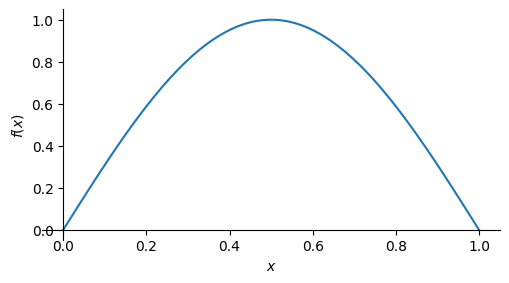

In [16]:
#| output: false
sp.plot(psi_x.subs(l,1),(x,0,1),size=(5.9,3),show=False).save('bilder/fig-formfunktion.svg')


![Analytische Formfunktion](bilder/fig-formfunktion.svg){#fig-formfunktion}

##### Rayleigh - Quotient

Der Rayleigh-Quotient ist eine Energiebetrachtung. Er setzt die potentielle, maximale Energie $E_{pot,max}$ zur kinetischen, maximalen Energie $E_{kin,max}$ ins Verhältnis. Daraus lässt sich die Kreisfrequenz $\omega_n$ herauslösen.
$$E_{pot,max} = E_{kin,max}$$

$$\omega_1^2 = \frac{\int_0^L EI[u''(x)]^2 dx}{\int_0^L m_{const.}[u(x)]^2 dx}$$

Dies lässt sich mit entsprechender Formfunktion schreiben:

$$\omega_1^2 = \frac{\int_0^L EI[\Psi''(x)]^2 dx}{\int_0^L m_{const.}[\Psi(x)]^2 dx}$$


In [17]:
E, I, m_const = sp.symbols('E I m_const',real=True)
omega_1 = sp.sqrt(sp.integrate(E*I*sp.diff(psi_x,x,2)**2, (x,0,l)) /sp.integrate(m_const*psi_x**2, (x,0,l)) )


render.eq_display('omega_1', omega_1.doit())

            _________
      2    ╱   E⋅I   
     π ⋅  ╱  ─────── 
        ╲╱   m_const 
ω₁ = ────────────────
             2       
            l        

Dies entspricht der exakten Lösung! Da die Formfunktion mit Biegelinie übereinstimmt.

#### Formfunktion aus Biegelinie

In [18]:
a, b,F = sp.symbols('a b F')

b = l/2
a = b


zeta = x/l
beta = b/l
alpha = a/l

w_x_biegelinie_1 = (F*l**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)))/(E*I)
w_x_biegelinie_2 = sp.simplify((F*l**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)+(zeta-alpha)**3)))/(E*I)

w_x_biegelinie = sp.Piecewise((w_x_biegelinie_1,x<=a), (w_x_biegelinie_2,x>a))
w_x_biegelinie



⎧               ⎛     2⎞                    
⎪           2   ⎜3   x ⎟                    
⎪        F⋅l ⋅x⋅⎜─ - ──⎟                    
⎪               ⎜4    2⎟                    
⎪               ⎝    l ⎠                   l
⎪        ───────────────           for x ≤ ─
⎨             12⋅E⋅I                       2
⎪                                           
⎪  ⎛  ⎛   2      2⎞            3⎞           
⎪F⋅⎝x⋅⎝3⋅l  - 4⋅x ⎠ - (l - 2⋅x) ⎠           
⎪────────────────────────────────  otherwise
⎪             48⋅E⋅I                        
⎩                                           

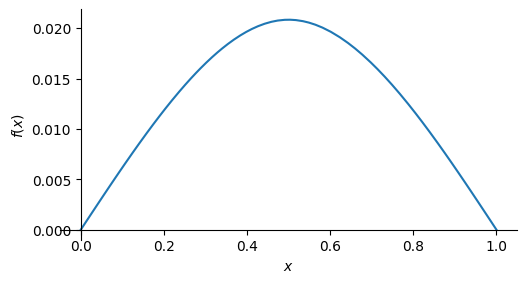

In [19]:
#| output: false


sp.plot(w_x_biegelinie.subs([(l,1),(F,1),(E,1),(I,1)]), (x,0,1),size=(5.9,3),show=False).save('bilder/fig-formfunktion_biege.svg')

![Formfunktion aus Biegelinie abgeleitet](bilder/fig-formfunktion_biege.svg){#fig-formfunktion_biege}

##### Normierung
Es ist ersichtlich, dass die Formfunktion noch eine Normierung benötigt.
Dazu wird der Maximalwert zu $1$ gesetzt. Die Randbedingungen sind bereits erfüllt.

In [20]:
w_x_biegelinie_norm = w_x_biegelinie * w_x_biegelinie.subs(x,l/2)**-1

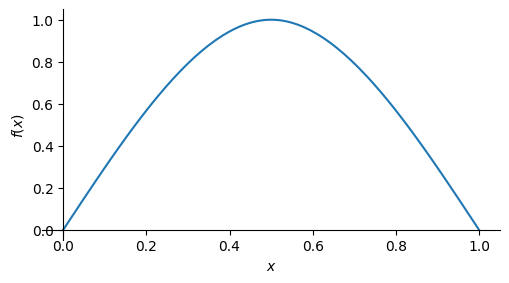

In [21]:
#| output: false

sp.plot(w_x_biegelinie_norm.subs([(l,1),(F,1),(E,1),(I,1)]), (x,0,1),size=(5.9,3),show=False).save('bilder/fig-formfunktion_biege_norm.svg')


![Formfunktion aus Biegelinie normiert](bilder/fig-formfunktion_biege_norm.svg){#fig-formfunktion_biege_norm}

##### Rayleigh - Quotient


In [22]:
omega_1_biege = sp.sqrt(sp.integrate(E*I*sp.diff(w_x_biegelinie_norm,x,2)**2, (x,0,l)) /sp.integrate(m_const*w_x_biegelinie_norm**2, (x,0,l)) )


render.eq_display('omega_1_biege', omega_1_biege.evalf(3))

                          0.5
                 ⎛  E⋅I  ⎞   
            9.94⋅⎜───────⎟   
                 ⎝m_const⎠   
ω_1_biege = ─────────────────
                     2       
                    l        

Die Abweichung zur exakten Lösung ist minimal.

#### Vergleich beider Lösungen

In [23]:

render.eq_display('Abweichung', ((omega_1_biege / omega_1-1)*100).evalf(2)*unit.percent)

Abweichung = 0.72⋅percent

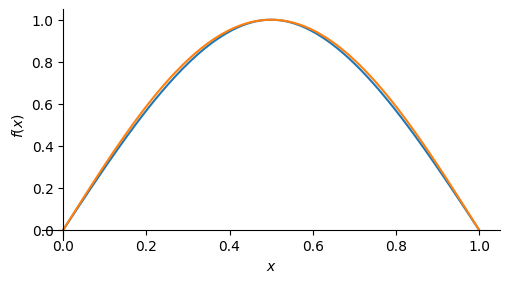

In [24]:
#| output: false
#| label: fig-formfunktion_vergleich
#| fig-cap: "Überlagerung beider Funktionen"

sp.plot(w_x_biegelinie_norm.subs([(l,1),(F,1),(E,1),(I,1)]),psi_x.subs(l,1), (x,0,1),size=(5.9,3),show=False).save('bilder/fig-formfunktion_vergleich.svg')


![Überlagerung beider Funktionen](bilder/fig-formfunktion_vergleich.svg){#fig-formfunktion_vergleich}